<h1> Social Media Search Winners </h1>
<hr>
<h3> An analysis of social media search trends with the following range:
    <ul>
        <li>COVID-19 Case 1 in the US (Jan 14, 2020)</li>
        <li>present (Apr 1, 2020)</li>
    </ul>
</h3>

[According to the CDC](https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/cases-in-us.html), the first case of COVID-19 in the United States occured on January 14th, 2020.

As of April 1, 2020, there are now [217,263 confirmed cases](https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) of COVID-19 in the US.

<b>Pytrends</b> acts as an unofficial Google Trends API. Documentation and project information can be found [here](https://pypi.org/project/pytrends/1.1.3/).

In [1]:
# installing pytrends python package which acts as an unofficial Google Trends API
!pip install pytrends --q

Import pandas, numpy, and matplotlib.

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
plt.style.use('ggplot')

Allows us to connect to Google without a proxy.

In [3]:
# connect to Google
from pytrends.request import TrendReq
pytrend = TrendReq(hl='en-US', tz=360)

Creating two seperate dataframes. One dataframe will hold google trends data for <b>TikTok, Snapchat, Twitter,</b> and <b>Instagram</b>. The other dataframe will hold google trends data for <b>Coronavirus</b>.

In [4]:
#create dataframe
keywords = ['TikTok', 'Snapchat', 'Twitter', 'Instagram']
pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='today 12-m',
     geo='US',
     gprop='')
df = pytrend.interest_over_time()
df = df.drop(labels=['isPartial'], axis='columns')
df.to_csv('social_media_google_search.csv', encoding='utf-8')

In [5]:
#create dataframe 2
keywords = ['Coronavirus']
pytrend.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='today 12-m',
     geo='US',
     gprop='')
df2 = pytrend.interest_over_time()
df2 = df2.drop(labels=['isPartial'], axis='columns')
df.to_csv('coronavirus_google_search.csv', encoding='utf-8')

Locating the period Jan 14, 2020 - April 1, 2020.

In [6]:
social_media_change = df.loc['2020-01-14':'2020-04-01']

Setting each social media searches's variable to <b>maximum - minimum</b> to find the change in search % for each.

In [7]:
tiktok_change = social_media_change['TikTok'].max() - social_media_change['TikTok'].min()
snapchat_change = social_media_change['Snapchat'].max() - social_media_change['Snapchat'].min()
twitter_change = social_media_change['Twitter'].max() - social_media_change['Twitter'].min()
instagram_change = social_media_change['Instagram'].max() - social_media_change['Instagram'].min()

Setting the coronavirus variable to <b>maximum - minimum</b> to find the change in search %.

In [8]:
coronavirus_change = df2.loc['2020-01-14':'2020-04-01']
coronavirus_change_filter = coronavirus_change['Coronavirus'].max() - coronavirus_change['Coronavirus'].min()
print(tiktok_change)
print(snapchat_change)
print(twitter_change)
print(instagram_change)

11
4
14
21


<b>Creating 2 plots.</b>

The first plot will contain all social media searches and their change over the last 12 months.

The second plot will contain only coronavirus searches and it's change over the last 12 months.

There is an annotation available for January 14th, 2020 which is labeled as <b>Case #1</b>.

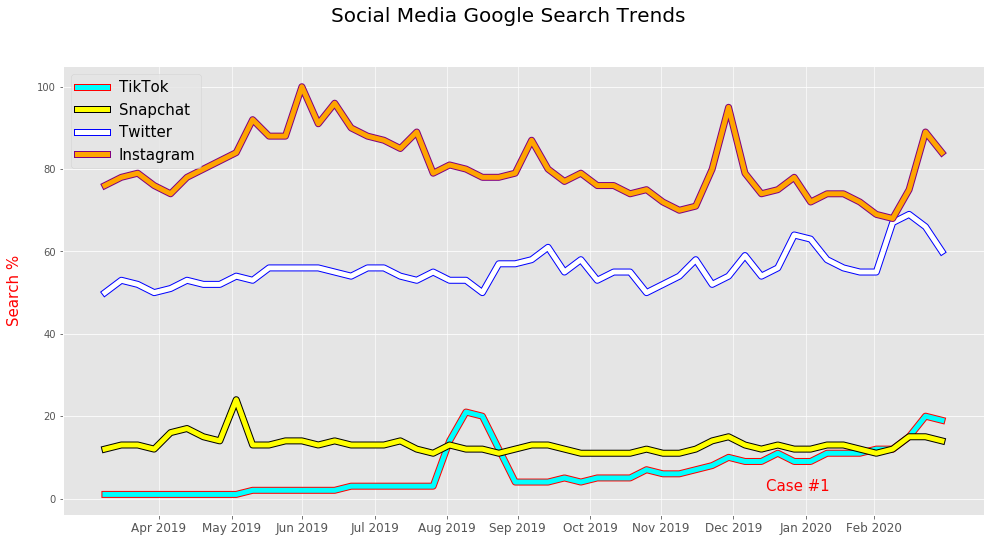

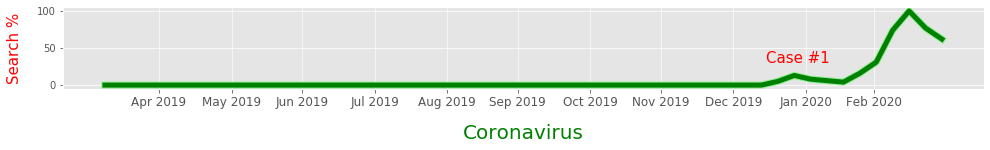

In [9]:
#create plot
fig2, (ax1) = plt.subplots(1, 1,figsize=(16.5,8.25), sharex=True)
ax1.plot(df.index, df['TikTok'], color='cyan', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='red'), pe.Normal()])
ax1.plot(df.index, df['Snapchat'], color='yellow', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='black'), pe.Normal()])
ax1.plot(df.index, df['Twitter'], color='white', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='blue'), pe.Normal()])
ax1.plot(df.index, df['Instagram'], color='orange', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='purple'), pe.Normal()])
plt.legend(df, loc=2, prop={'size': 15})
#grid, title, labels
ax1.xaxis.grid(True,alpha=.8)
fig2.suptitle('Social Media Google Search Trends', fontsize=20)
fig2.subplots_adjust(hspace=.5)
ax1.set_ylabel('Search %', fontsize=15, labelpad=15, color='red')
#ticks
xtick_dates = pd.date_range(start = df.index[0], end = df.index[-1], freq='1M')
plt.xticks(xtick_dates, [dtz.strftime('%b %Y') for dtz in xtick_dates], fontsize=12)
#annotation
style = dict(size=15, color='red')
ax1.text(pd.to_datetime('2020-01-14'), 2, "Case #1", **style)

#create plot, set grid, title, labels, ticks, annotation
fig2, (df2ax1) = plt.subplots(1, 1,figsize=(16.5,1.5))
df2ax1.plot(df.index, df2['Coronavirus'], color='green', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='lightgreen'), pe.Normal()])
df2ax1.xaxis.grid(True,alpha=0.8)
df2ax1.set_xlabel('Coronavirus', fontsize=20, labelpad=15, color='green')
df2ax1.text(pd.to_datetime('2020-01-14'), 30, "Case #1", **style)
xtick_dates2 = pd.date_range(start = df2.index[0], end = df2.index[-1], freq='1M')
plt.xticks(xtick_dates2, [dtz.strftime('%b %Y') for dtz in xtick_dates2], fontsize=12)
df2ax1.set_ylabel('Search %', fontsize=15, labelpad=15, color='red')

plt.show();

<b>Creating a subplot of 4 plots.</b>

The first plot will contain only TikTok searches and it's change over the last 12 months.

The second plot will contain only Snapchat searches and it's change over the last 12 months.

The third plot will contain only Twitter searches and it's change over the last 12 months.

The fourth plot will contain only Instagram searches and it's change over the last 12 months.

<b>Creating an extra plot for Coronavirus.</b>

The fifth plot will contain only coronavirus searches and it's change over the last 12 months.

There is an annotation available for January 14th, 2020 which is labeled as Case #1.

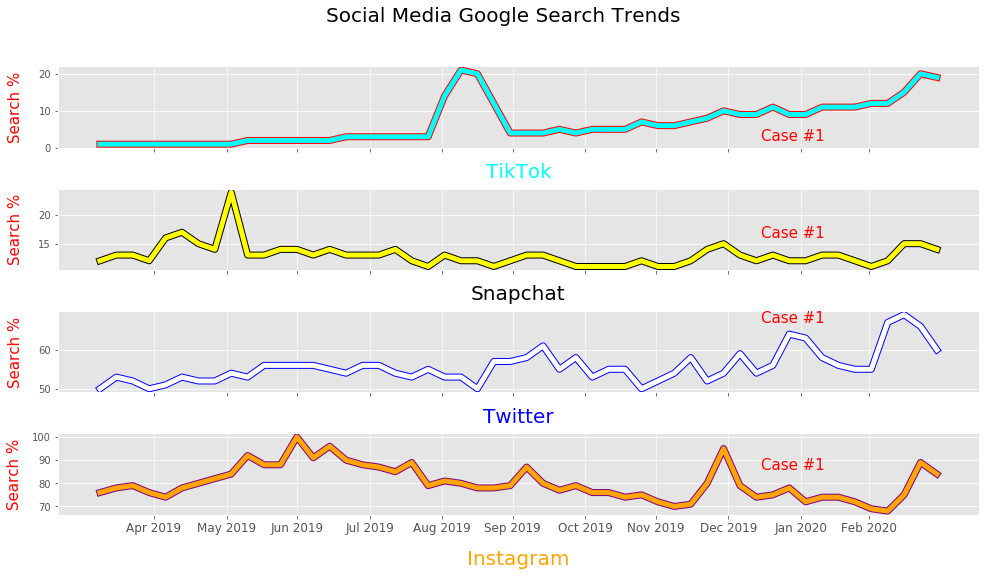

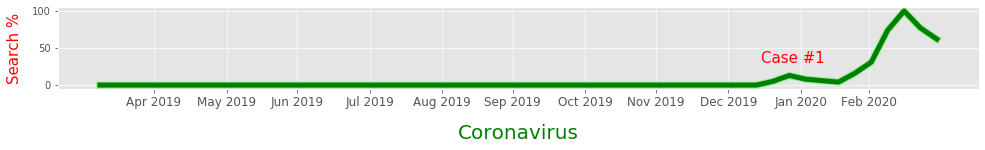

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1,figsize=(16.5,8.25), sharex=True)
ax1.plot(df.index, df['TikTok'], color='cyan', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='red'), pe.Normal()])
ax1.xaxis.grid(True,alpha=0.8)
ax1.set_xlabel('TikTok', fontsize=20, labelpad=15, color='cyan')
ax1.set_ylabel('Search %', fontsize=15, labelpad=15, color='red')

ax2.plot(df.index, df['Snapchat'], color='yellow', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='black'), pe.Normal()])
ax2.xaxis.grid(True,alpha=0.8)
ax2.set_xlabel('Snapchat', fontsize=20, labelpad=15, color='black')
ax2.set_ylabel('Search %', fontsize=15, labelpad=15, color='red')

ax3.plot(df.index, df['Twitter'], color='white', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='blue'), pe.Normal()])
ax3.xaxis.grid(True,alpha=0.8)
ax3.set_xlabel('Twitter', fontsize=20, labelpad=15, color='blue')
ax3.set_ylabel('Search %', fontsize=15, labelpad=15, color='red')

ax4.plot(df.index, df['Instagram'], color='orange', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='purple'), pe.Normal()])
ax4.xaxis.grid(True,alpha=0.8)
ax4.set_xlabel('Instagram', fontsize=20, labelpad=15, color='orange')
ax4.set_ylabel('Search %', fontsize=15, labelpad=10, color='red')

fig.suptitle('Social Media Google Search Trends', fontsize=20)
fig.subplots_adjust(hspace=.5)

xtick_dates = pd.date_range(start = df.index[0], end = df.index[-1], freq='1M')
plt.xticks(xtick_dates, [dtz.strftime('%b %Y') for dtz in xtick_dates], fontsize=12)

style = dict(size=15, color='red')
ax1.text(pd.to_datetime('2020-01-14'), 2, "Case #1", **style)
ax2.text(pd.to_datetime('2020-01-14'), 16, "Case #1", **style)
ax3.text(pd.to_datetime('2020-01-14'), 67, "Case #1", **style)
ax4.text(pd.to_datetime('2020-01-14'), 86, "Case #1", **style)

fig, (df2ax1) = plt.subplots(1, 1,figsize=(16.5,1.5))
df2ax1.plot(df.index, df2['Coronavirus'], color='green', linewidth=5, path_effects=[pe.Stroke(linewidth=7, foreground='lightgreen'), pe.Normal()])
df2ax1.xaxis.grid(True,alpha=0.8)
df2ax1.set_xlabel('Coronavirus', fontsize=20, labelpad=15, color='green')
df2ax1.set_ylabel('Search %', fontsize=15, labelpad=10, color='red')
df2ax1.text(pd.to_datetime('2020-01-14'), 30, "Case #1", **style)
xtick_dates2 = pd.date_range(start = df2.index[0], end = df2.index[-1], freq='1M')
plt.xticks(xtick_dates2, [dtz.strftime('%b %Y') for dtz in xtick_dates2], fontsize=12)


plt.show()

<h2>Conclusion</h2>

<b>TikTok</b> has seen growth of 11% since January 14th, 2020.

<b>Snapchat</b> has seen growth of 3% since January 14th, 2020.

<b>Twitter</b> has seen growth of 15% since January 14th, 2020.

<b>Instagram</b> has seen growth of 21% since January 14th, 2020.

<ul>
    <li>The greatest gain has been <b>Instagram</b> with 21% since the first case of COVID-19 was confirmed in the US.</li>
    <li>The lowest gain has been <b>Snapchat</b> with 3% since the first cae of COVID-19 was confirmed in the US.</li>
    <li><b>TikTok</b> seems to have the most consistent gain & search activity, because all other social media searches seem to reach their maximum and rapidly decline. Especially in the case of <b>Twitter</b> and <b>Instagram</b>. It is likely that <b>Snapchat</b> will have the most to gain for the duration of this ongoing pandemic.</li>
</ul>
